<!-- ---------------------------------------------------- -->
  <div class="col-sm-3 col-md-3 col-lg-3">
	<!-- logo -->  
    <div class="img-responsive">
      <img src="https://dl.dropboxusercontent.com/u/37919918/hedaro/pandas-ipython-tutorials-hedaro.jpg" title="Tensorflow Tutorial | Hedaro" alt="Tensorflow Tutorial | Hedaro">    
    </div>
	<!-- logo -->	
  </div>
<!-- ---------------------------------------------------- --> 
  <div class="col-sm-6 col-md-6 col-lg-6">
	<!-- Tensorflow Tutorial -->  
	  <center>
	    <br>
        <h1>Tensorflow</h1>
        <p><center>04 - Lesson</center></p>
	  </center>	
    <!-- Tensorflow Tutorial -->	
  </div>
<!-- ---------------------------------------------------- -->

> Your very first Neural Network model using Tensorflow! You are going to learn how to model a simple line ***y = m * x + b** and use it to predict the values of ***y*** given ***x*** values.

In [1]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # use this plot style
import sys
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Tensorflow version ' + tf.VERSION)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.5.1 |Anaconda custom (64-bit)| (default, Feb 16 2016, 09:49:46) [MSC v.1900 64 bit (AMD64)]
Tensorflow version 0.12.0-rc0
Pandas version 0.19.0
Numpy version 1.11.0


# Create Training Data  

    y = m * x + b  

* We are going to call our ***x*** variable, ***train_x***  
* We are going to call our ***y*** variable, ***train_y***


In [3]:
# let's generate 100 random samples
train_x = np.random.rand(100).astype(np.float32)

In [4]:
# let's compute train_y using 0.1 for m and 0.3 for b
train_y = 0.1 * train_x + 0.3

Let us pause for a second....  

What have you done thus far? You have simply created your ***training data*** that you are going to use to train your model. You will shortly be feeding in ***train_x*** to your model and ask it to predict what ***train_y*** should be. Your model needs to figure out what the values for ***m*** and ***b*** need to be in order be correct in its prediction. You already know the answer (m=0.1, b=0.3) but your job is to train your model to come up with the correct answer.

> Plot the Data so you know what you are working with

In [5]:
df = pd.DataFrame({'x':train_x,
                   'y':train_y})
df.head()

,x,y
0,0.528838,0.352884
1,0.838198,0.383820
2,0.980512,0.398051
3,0.166963,0.316696
4,0.323328,0.332333


In [6]:
df.describe()

,x,y
count,100.000000,100.000000
mean,0.463669,0.346367
std,0.303015,0.030301
min,0.003953,0.300395
25%,0.175461,0.317546
50%,0.395604,0.339560
75%,0.754374,0.375437
max,0.996693,0.399669


This is not a very exciting chart, but you can clearly see this is just a straight line. We could have added some noise to the data but I am trying to make this lesson as simple as possible.

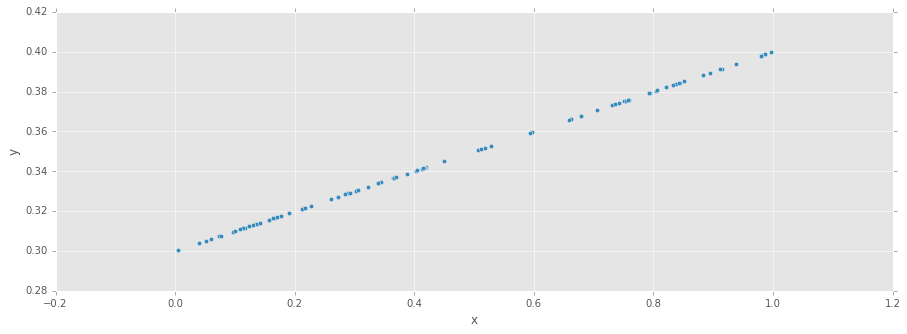

In [7]:
df.plot.scatter(x='x', y='y', figsize=(15,5));

# Create Test Data  

This is the data that you are going to use to verify that your model actually works. The test data should be data that your model has not seen before. In other words your training data should be different than your test data.

In [8]:
# this is the data we are going to use to make sure our model is generating good predictions
test_x = np.random.rand(100).astype(np.float32)

# Model your Graph

> IMPORTANT functions/parameters to play with  

* ***loss*** - There are various functions you can choose to measure the ***error*** between ***train_y*** (your training data) and ***pred*** (your models predicted value)  
* ***GradientDescentOptimizer(LEARNING_RATE)*** - Modify this number to see how your results change

### Variables  

In the previous lessons, you have just defined constants and placeholders. In this lesson you are introducing Variables to the mix.  

When your model runs it will initialize your variables ***W*** and ***b***. On every training iteration it will adjust the values for variables ***W*** and ***b***. For this to occur, you need to define ***W*** and ***b*** as variables.  

* ***Constants*** - Values created before you run our model that do not change.
* ***Placeholders*** - Values that are fed into your model at run time.
* ***Variables*** - Values that are modified at run time by your model.  
* ***W*** - Weights for your output layer.  
* ***b*** - Biases for your output layer.  

In [9]:
# placeholders
x = tf.placeholder(tf.float32, name="01_x")
y = tf.placeholder(tf.float32, name="01_y")

# variables
# Note that np.random.rand() is used to initialize your variables
W = tf.Variable(np.random.rand())
b = tf.Variable(np.random.rand())
pred = tf.mul(W, x) + b

# minimize the mean squared errors
# as mentioned above there are other ways to measure the error between train_y and pred
loss = tf.reduce_mean(tf.square(pred - y))

# we pick our optimizer and a learning rate
optimizer = tf.train.GradientDescentOptimizer(0.7)

# we train our model by minimizing our loss function
train = optimizer.minimize(loss)

# Time to Train!

> When working with Variables you must initialize them with some default values, ***tf.global_variables_initializer()*** does that for you.

You are going to train your model 200 times and see if we can create a model that can accurately predict. Play around with the number of training rounds, the Learning Rate, and see how this changes your results.

In [10]:
# initialize the variables
init = tf.global_variables_initializer()

# run your graph
with tf.Session() as sess:
    sess.run(init)

    # fit the function.
    for step in range(200):
        # get your data
        train_data = {x:train_x, y:train_y}
        
        # training in progress...
        sess.run(train, feed_dict=train_data)        
        
        # print the last 20 results
        if step > 180:
            print(step, sess.run(W), sess.run(b))
            
    # note that W and b mach the line we are tying to model (y = 0.1x + 0.3)
    print("Training completed:", "W=", sess.run(W), "b=", sess.run(b))
    
    # run your trained model on the test data set
    test_results = sess.run(pred, feed_dict={x: test_x})
    
    # capture the predicted results so you can plot them
    df_final = pd.DataFrame({'test_x':test_x,
                             'pred':test_results})

181 0.1 0.3
182 0.1 0.3
183 0.1 0.3
184 0.1 0.3
185 0.1 0.3
186 0.1 0.3
187 0.1 0.3
188 0.1 0.3
189 0.1 0.3
190 0.1 0.3
191 0.1 0.3
192 0.1 0.3
193 0.1 0.3
194 0.1 0.3
195 0.1 0.3
196 0.1 0.3
197 0.1 0.3
198 0.1 0.3
199 0.1 0.3
Training completed: W= 0.1 b= 0.3


# Plot the Training Data vs the Test Data  

As you can see, your NN model is doing very well. You were able to get a line that matches perfectly using data that was not part of the training data set.  

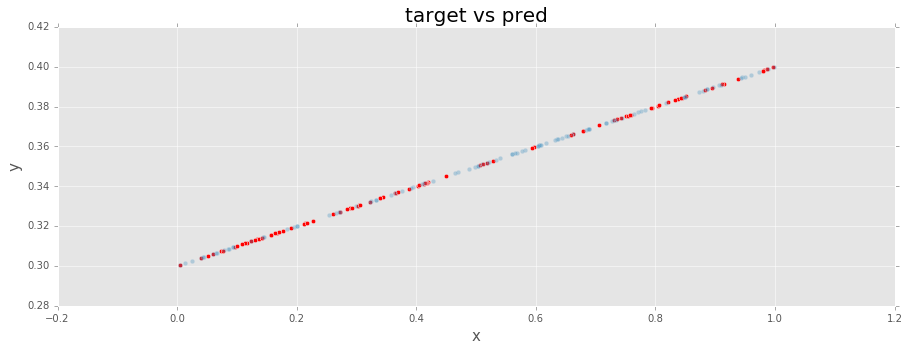

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))

# Chart 1 - Shows the line we are trying to model
df.plot.scatter(x='x', y='y', ax=axes, color='red')

# Chart 2 - Shows the line our trained model came up with
df_final.plot.scatter(x='test_x', y='pred', ax=axes, alpha=0.3)

# add a little sugar
axes.set_title('target vs pred', fontsize=20)
axes.set_ylabel('y', fontsize=15)
axes.set_xlabel('x', fontsize=15);

There was a lot of information I ommitted in this lesson but the main point was to get you used to the mechanics of getting a simple NN model working. Don't get stuck in this lesson, your questions will be answered in the next lessons.

<p class="text-muted">This tutorial was created by <a href="http://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>